In [3]:
import pandas as pd
import numpy as np

# Introduction

The name "pandas" is a portmanteau of "panel data".

1. input/output of le formats into memory data structures
2. DataFrames and Series (also specialised for Time series)
3. label-based slicing, fancy indexing, and subsetting
4. reshaping and pivoting
5. group by, join, merge, melt, concatenation
6. handling of missing data =IMPORTANT=

ACCESSING ROWS AND COLUMNS

`dataframe[col]` => Returns the column

`df.loc[label]` => Selects row by row label (or Series index). Returns a row.

`df.iloc[col]` => Select row by index number. 

`df.loc[[rows,columns]]` => Treat the DF like an array at this point.

`pd.Series(1dimarray, index=1dimarray)`


`series.index` => Will return the indeces. If index isn't passed it will be 0..N


`series.values`=> Will give you the np array. 

`dataframe.dropna()`=> Will remove the ROWS with NaN values.

`del df[\'column name\']`=> Will delete the column

`dataframe.insert(row, column, values)` => To insert values into the dataframe

VISUALISING USEFUL FUNCTIONS

`dataframe.head` => Displays the first 5 rows.

`dataframe.info`=> Information about the df.

`dataframe.plot()`=> Just plots it.

# Series


It is a one dimenisional labelled array that can hold any data type. It slices just like a normal array.

Q&A
1. Difference between numpy and a Series? The index.


In [16]:
from pandas import Series
s = Series(np.random.rand(5), index=list('ABCDE'))
s

A    0.432624
B    0.138535
C    0.636315
D    0.326393
E    0.900229
dtype: float64

In [13]:
s.index # Returns the index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [25]:
d = {'b': 1, 'a': 0, 'c': 2, 'd':5, 'e': np.NaN}
s = pd.Series(d)
s

b    1.0
a    0.0
c    2.0
d    5.0
e    NaN
dtype: float64

# Fancy indexing, slicing and manipulating columns

In [22]:
# Whatever this was
s[[3,1]] 

d    5.0
a    0.0
dtype: float64

In [27]:
s['e'] = 9
# print(s.median, s.mean, s.std)

In [28]:
# Pandas to np array
s.values

array([1., 0., 2., 5., 9.])

In [29]:
s[s > s.median()]

d    5.0
e    9.0
dtype: float64

In [40]:

a = Series(np.random.randint(0,4,4), index=list('BCDE'))
b = Series(np.random.randint(0,4,4), index=list('ABCD'))

a + b

A    NaN
B    2.0
C    3.0
D    5.0
E    NaN
dtype: float64

In [87]:
d = {'Col1': [1., 2., 3., 4.,.5,.3], 'Col2': [4., 3., 2., 1.,.3,.2]}
d = pd.DataFrame(d, index=['a','b','c','d','e','f'])
d

,Col1,Col2
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0
e,0.5,0.3
f,0.3,0.2


In [84]:
del d['Col1']  # use 'drop()' - this will return the array not modify it in memory
d

,Col2
a,4.0
b,3.0
c,2.0
d,1.0
e,0.3
f,0.2


In [69]:
d.insert(1, 'Col1',[4., 3., 2., 1.,.3,.2] )
d

,Col2,Col1
a,4.0,4.0
b,3.0,3.0
c,2.0,2.0
d,1.0,1.0
e,0.3,0.3
f,0.2,0.2


In [72]:
d.loc['a']

Col2    4.0
Col1    4.0
Name: a, dtype: float64

In [75]:
d.iloc[1]

Col2    3.0
Col1    3.0
Name: b, dtype: float64

In [76]:
d['c':'e']

,Col2,Col1
c,2.0,2.0
d,1.0,1.0
e,0.3,0.3


In [83]:
d.iloc[1:3,0:1]

,Col2
b,3.0
c,2.0


In [90]:
d.drop(rows = ['a'], columns=['Col1']) # Can't drop at the same time rows and columns

TypeError: drop() got an unexpected keyword argument 'rows'

In [91]:
d.drop(['a'])

,Col1,Col2
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0
e,0.5,0.3
f,0.3,0.2


# DataFrame

Essentially a dicitonary of Series.

The 2 + Series must have intersecting indeces. 

The key becomes the column identifier.

In [41]:
from pandas import DataFrame

d = {'one': Series([1., 2., 3.], index=['a', 'b', 'c']),
'two': Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [42]:
print(df.index, df.columns)

Index(['a', 'b', 'c', 'd'], dtype='object') Index(['one', 'two'], dtype='object')


In [45]:
df.one  # If given a variable type name, columns can be acessed like this

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [47]:
df.one.c  # Likewise for the indeces

3.0

In [53]:
# From np array
npdf = DataFrame(np.random.randn(3, 4), index=['a','b','c'], columns=['A', 'B', 'C',
'D'])

# From dict of lists
dictdf = DataFrame({'Col1': [1., 2., 3., 4.,.5,.3], 'Col2': [4., 3., 2., 1.,.3,.2]}, index=['a','b','c','d','e','f'])

# Handling missing data

In [92]:
df = pd.DataFrame(np.random.randn(3, 4), index=['a','b','c'], columns=['A', 'B', 'C',
'D'])

df.A.a = np.NaN

TypeError: 'bool' object is not callable

In [49]:
df.dropna()

,A,B,C,D
b,0.941046,0.701827,-0.513266,-1.179055
c,0.429195,-0.198322,0.068133,-0.615785


# Visualising

In [58]:
df = DataFrame((np.random.randn(7, 4)*5).astype(int), columns=list('ABCD'), index=list('abcdefg'))
df.head()

,A,B,C,D
a,-1,0,-6,9
b,-6,-8,-7,4
c,0,-6,7,-2
d,3,-4,-9,7
e,-8,5,4,0


<AxesSubplot:>

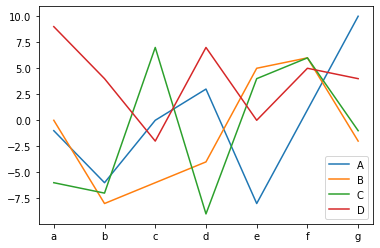

In [59]:
df.plot()

<AxesSubplot:xlabel='A', ylabel='B'>

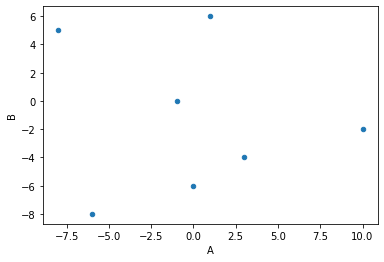

In [62]:
df.plot.scatter(x='A', y='B')

<AxesSubplot:>

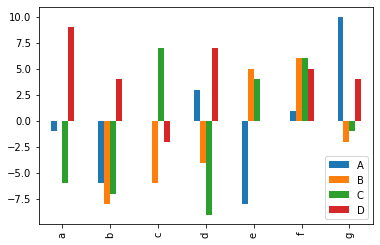

In [63]:
df.plot.bar()

<AxesSubplot:ylabel='Frequency'>

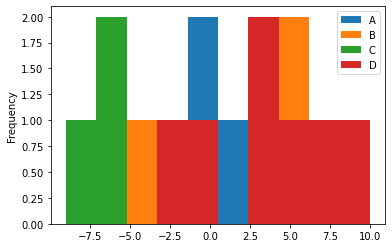

In [68]:
df.plot.hist(bins=10)